In [153]:
!pip install tensorflow-gpu ## Using my system's gpu to train this model. 

ERROR: Invalid requirement: '##'


In [204]:
import tensorflow as tf

In [205]:
print(tf.__version__)

2.9.1


In [206]:
##import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [207]:
import os

os.chdir('E:\\') 


In [270]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [271]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [272]:
## Divide the dataset into dependent and independent components

X= dataset.iloc[:, 3:13] ## We drop a few columns that we think/know won't help our model
y=dataset.iloc[:,-1]

In [273]:
X.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4788,757,Spain,Female,44,9,0.00,2,1,0,177528.92
4193,550,Spain,Male,45,0,0.00,2,0,1,70399.71
1100,850,France,Female,39,2,148586.64,1,1,1,176791.27
8976,720,France,Male,29,2,0.00,2,1,0,39925.52
4741,651,France,Male,45,2,165901.59,2,1,0,23054.51


In [274]:
y.sample(5)

615     1
773     0
8659    0
4528    0
2864    0
Name: Exited, dtype: int64

In [275]:
##Feature Engineering

geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [276]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [277]:
##Concatenate these variables with the dataframe

X=X.drop(['Geography', 'Gender'], axis = 1)

In [278]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [279]:
X = pd.concat([X,geography, gender], axis = 1 )

In [280]:
X.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
180,850,45,2,122311.21,1,1,1,19482.50,0,1,0
7967,583,40,9,112701.04,1,0,0,29213.63,0,0,1
4345,720,46,3,97042.60,1,1,1,133516.51,1,0,1
9150,717,28,4,128206.79,1,1,1,54272.12,0,0,1
3932,680,23,5,140007.19,1,0,1,31714.08,0,0,1


In [281]:
X.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

In [282]:
y.isnull().sum()

0

In [283]:
##Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 9)

In [285]:
## NOte, with ANN, feature scaling is almost imperative. Most algorithms that require gradient descent or some distance band will 
## require scaling.

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
sc = StandardScaler()

In [288]:
X_train = sc.fit_transform(X_train) ## To avoid data leakage, we do fit_trainsform for the train set and only fit for the test set
X_test = sc.fit_transform(X_test)

In [289]:
X_train

array([[-0.55498354, -0.37147055,  1.03768102, ...,  1.73205081,
        -0.57965968, -1.09748077],
       [ 0.48605107,  0.48924515,  1.7300742 , ...,  1.73205081,
        -0.57965968,  0.9111777 ],
       [-0.31791625, -0.94528101, -0.69330195, ..., -0.57735027,
        -0.57965968, -1.09748077],
       ...,
       [-0.67867082,  1.541231  ,  1.7300742 , ..., -0.57735027,
        -0.57965968,  0.9111777 ],
       [-1.66816907, -0.75401086,  0.69148442, ..., -0.57735027,
        -0.57965968, -1.09748077],
       [ 0.68188927,  1.92377131, -0.34710536, ..., -0.57735027,
        -0.57965968, -1.09748077]])

In [290]:
X_test

array([[-0.59141595, -0.66663363, -0.70673342, ..., -0.58427872,
        -0.55039222, -1.09003844],
       [ 0.48066571,  1.59569771, -0.362573  , ..., -0.58427872,
         1.81688615, -1.09003844],
       [ 2.1098094 , -0.38384222, -1.39505426, ..., -0.58427872,
        -0.55039222, -1.09003844],
       ...,
       [-0.30762963, -0.57236983,  1.3582291 , ..., -0.58427872,
        -0.55039222, -1.09003844],
       [-1.01184013, -0.00678699, -1.39505426, ..., -0.58427872,
         1.81688615, -1.09003844],
       [-1.61094458, -0.66663363, -0.362573  , ..., -0.58427872,
        -0.55039222,  0.91739884]])

In [291]:
X_train.shape

(8000, 11)

In [292]:
X_test.shape

(2000, 11)

In [293]:
## We now create the ANN. We will use Tensorflow (open source created by Google) and keras (created by apple)

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [295]:
## ANN initialization

classifier = Sequential()

In [296]:
## We add our layers by starting with the input layer and the corresponding activation function

classifier.add(Dense(units=11, activation = 'relu')) ## 11 inputs neurons here each for the number of input features in our dataset

#classifier.add(Dropout(.2))  ## This will randomly select some nodes to be dropped out with a probability of 20% during training

## First hidden layer

classifier.add(Dense(units=7, activation = 'relu'))

classifier.add(Dropout(.3))
##Second hidden layer

classifier.add(Dense(units=6, activation = 'relu'))

#classifier.add(Dropout(.2))

In [297]:
## Adding the output layer

classifier.add(Dense(units=1, activation = 'sigmoid'))

# we can go ahead and use the adam optimizer which has a default learning rate of .01

In [298]:
##classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])) 

In [299]:
## If we want to use our own learning rate, we can define it as seen below:
import tensorflow

opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)


In [300]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics =['accuracy'])

In [256]:
model_history = classifier.fit(X_train, y_train, validation_split = .33, batch_size = 10, epochs = 1000)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8418 - val_loss: 0.3539 - val_accuracy: 0.8622
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8431 - val_loss: 0.3562 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8431 - val_loss: 0.3549 - val_accuracy: 0.8569
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8419 - val_loss: 0.3570 - val_accuracy: 0.8557
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8410 - val_loss: 0.3551 - val_accuracy: 0.8557
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8446 - val_loss: 0.3537 - val_accuracy: 0.8535
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8375 - val_loss: 0.3556 - val_accuracy:

536/536 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8472 - val_loss: 0.3788 - val_accuracy: 0.8550
Epoch 58/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8391 - val_loss: 0.3585 - val_accuracy: 0.8501
Epoch 59/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8470 - val_loss: 0.3607 - val_accuracy: 0.8554
Epoch 60/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8446 - val_loss: 0.3677 - val_accuracy: 0.8550
Epoch 61/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8419 - val_loss: 0.3702 - val_accuracy: 0.8546
Epoch 62/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8446 - val_loss: 0.3680 - val_accuracy: 0.8576
Epoch 63/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8418 - val_loss: 0.3553 - val_accuracy: 0.8561

536/536 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8369 - val_loss: 0.3708 - val_accuracy: 0.8542
Epoch 114/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8414 - val_loss: 0.3684 - val_accuracy: 0.8569
Epoch 115/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8481 - val_loss: 0.3618 - val_accuracy: 0.8584
Epoch 116/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8442 - val_loss: 0.3580 - val_accuracy: 0.8557
Epoch 117/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8433 - val_loss: 0.3611 - val_accuracy: 0.8527
Epoch 118/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8408 - val_loss: 0.3596 - val_accuracy: 0.8573
Epoch 119/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8431 - val_loss: 0.3625 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8419 - val_loss: 0.3936 - val_accuracy: 0.8535
Epoch 170/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8378 - val_loss: 0.3812 - val_accuracy: 0.8542
Epoch 171/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8453 - val_loss: 0.3924 - val_accuracy: 0.8387
Epoch 172/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8399 - val_loss: 0.3787 - val_accuracy: 0.8550
Epoch 173/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8444 - val_loss: 0.3712 - val_accuracy: 0.8402
Epoch 174/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8449 - val_loss: 0.3780 - val_accuracy: 0.8372
Epoch 175/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8406 - val_loss: 0.3809 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8403 - val_loss: 0.4346 - val_accuracy: 0.8523
Epoch 226/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8408 - val_loss: 0.3890 - val_accuracy: 0.8557
Epoch 227/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8470 - val_loss: 0.4280 - val_accuracy: 0.8550
Epoch 228/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8496 - val_loss: 0.3938 - val_accuracy: 0.8519
Epoch 229/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3471 - accuracy: 0.8457 - val_loss: 0.4069 - val_accuracy: 0.8542
Epoch 230/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8459 - val_loss: 0.4158 - val_accuracy: 0.8512
Epoch 231/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8408 - val_loss: 0.4100 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8397 - val_loss: 0.4800 - val_accuracy: 0.8557
Epoch 282/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8429 - val_loss: 0.3863 - val_accuracy: 0.8546
Epoch 283/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8423 - val_loss: 0.3997 - val_accuracy: 0.8497
Epoch 284/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8410 - val_loss: 0.4086 - val_accuracy: 0.8531
Epoch 285/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8438 - val_loss: 0.3963 - val_accuracy: 0.8508
Epoch 286/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8434 - val_loss: 0.4303 - val_accuracy: 0.8455
Epoch 287/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8444 - val_loss: 0.3873 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8423 - val_loss: 0.3907 - val_accuracy: 0.8569
Epoch 338/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8444 - val_loss: 0.3915 - val_accuracy: 0.8444
Epoch 339/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8457 - val_loss: 0.3888 - val_accuracy: 0.8595
Epoch 340/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8449 - val_loss: 0.3959 - val_accuracy: 0.8584
Epoch 341/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8470 - val_loss: 0.3807 - val_accuracy: 0.8580
Epoch 342/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3482 - accuracy: 0.8406 - val_loss: 0.4012 - val_accuracy: 0.8448
Epoch 343/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8475 - val_loss: 0.3796 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3425 - accuracy: 0.8496 - val_loss: 0.3935 - val_accuracy: 0.8561
Epoch 394/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8442 - val_loss: 0.3788 - val_accuracy: 0.8561
Epoch 395/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8427 - val_loss: 0.4004 - val_accuracy: 0.8573
Epoch 396/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.8434 - val_loss: 0.4495 - val_accuracy: 0.8580
Epoch 397/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8466 - val_loss: 0.3787 - val_accuracy: 0.8569
Epoch 398/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8461 - val_loss: 0.4022 - val_accuracy: 0.8580
Epoch 399/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8472 - val_loss: 0.3944 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8447 - val_loss: 0.4734 - val_accuracy: 0.8527
Epoch 450/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8419 - val_loss: 0.3892 - val_accuracy: 0.8573
Epoch 451/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8431 - val_loss: 0.3806 - val_accuracy: 0.8527
Epoch 452/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8461 - val_loss: 0.3940 - val_accuracy: 0.8383
Epoch 453/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8421 - val_loss: 0.4018 - val_accuracy: 0.8561
Epoch 454/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8462 - val_loss: 0.3849 - val_accuracy: 0.8569
Epoch 455/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8472 - val_loss: 0.3820 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3546 - accuracy: 0.8464 - val_loss: 0.4176 - val_accuracy: 0.8236
Epoch 506/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8406 - val_loss: 0.4466 - val_accuracy: 0.8565
Epoch 507/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8438 - val_loss: 0.3844 - val_accuracy: 0.8569
Epoch 508/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8444 - val_loss: 0.4111 - val_accuracy: 0.8504
Epoch 509/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8446 - val_loss: 0.4116 - val_accuracy: 0.8538
Epoch 510/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8440 - val_loss: 0.4367 - val_accuracy: 0.8550
Epoch 511/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8423 - val_loss: 0.4056 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8451 - val_loss: 0.3954 - val_accuracy: 0.8550
Epoch 562/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8425 - val_loss: 0.4091 - val_accuracy: 0.8576
Epoch 563/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8446 - val_loss: 0.5000 - val_accuracy: 0.8497
Epoch 564/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8423 - val_loss: 0.3920 - val_accuracy: 0.8451
Epoch 565/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8442 - val_loss: 0.4079 - val_accuracy: 0.8554
Epoch 566/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3431 - accuracy: 0.8468 - val_loss: 0.4256 - val_accuracy: 0.8569
Epoch 567/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8472 - val_loss: 0.4193 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8442 - val_loss: 0.3647 - val_accuracy: 0.8550
Epoch 618/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8455 - val_loss: 0.3691 - val_accuracy: 0.8542
Epoch 619/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8483 - val_loss: 0.3655 - val_accuracy: 0.8459
Epoch 620/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8446 - val_loss: 0.3755 - val_accuracy: 0.8474
Epoch 621/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8427 - val_loss: 0.3676 - val_accuracy: 0.8557
Epoch 622/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8416 - val_loss: 0.3750 - val_accuracy: 0.8523
Epoch 623/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8447 - val_loss: 0.3820 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8451 - val_loss: 0.4335 - val_accuracy: 0.8512
Epoch 674/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3435 - accuracy: 0.8440 - val_loss: 0.4377 - val_accuracy: 0.8561
Epoch 675/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8475 - val_loss: 0.4752 - val_accuracy: 0.8535
Epoch 676/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8453 - val_loss: 0.4708 - val_accuracy: 0.8527
Epoch 677/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8490 - val_loss: 0.4920 - val_accuracy: 0.8538
Epoch 678/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8455 - val_loss: 0.4509 - val_accuracy: 0.8523
Epoch 679/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8444 - val_loss: 0.4408 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8462 - val_loss: 0.3941 - val_accuracy: 0.8538
Epoch 730/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8423 - val_loss: 0.3967 - val_accuracy: 0.8569
Epoch 731/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8449 - val_loss: 0.4424 - val_accuracy: 0.8573
Epoch 732/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8390 - val_loss: 0.4009 - val_accuracy: 0.8501
Epoch 733/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8399 - val_loss: 0.4675 - val_accuracy: 0.8535
Epoch 734/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8429 - val_loss: 0.4074 - val_accuracy: 0.8497
Epoch 735/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8410 - val_loss: 0.4589 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8434 - val_loss: 0.4586 - val_accuracy: 0.8546
Epoch 786/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8449 - val_loss: 0.4359 - val_accuracy: 0.8546
Epoch 787/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8462 - val_loss: 0.4518 - val_accuracy: 0.8508
Epoch 788/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8433 - val_loss: 0.5011 - val_accuracy: 0.8576
Epoch 789/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8412 - val_loss: 0.4106 - val_accuracy: 0.8417
Epoch 790/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8410 - val_loss: 0.4434 - val_accuracy: 0.8459
Epoch 791/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8421 - val_loss: 0.4340 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8503 - val_loss: 0.4906 - val_accuracy: 0.8557
Epoch 842/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.8487 - val_loss: 0.4819 - val_accuracy: 0.8482
Epoch 843/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8470 - val_loss: 0.5000 - val_accuracy: 0.8557
Epoch 844/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3490 - accuracy: 0.8490 - val_loss: 0.4714 - val_accuracy: 0.8554
Epoch 845/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8492 - val_loss: 0.4610 - val_accuracy: 0.8531
Epoch 846/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8449 - val_loss: 0.5932 - val_accuracy: 0.8565
Epoch 847/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8464 - val_loss: 0.4368 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8455 - val_loss: 0.4585 - val_accuracy: 0.8542
Epoch 898/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8461 - val_loss: 0.4185 - val_accuracy: 0.8569
Epoch 899/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.8436 - val_loss: 0.4396 - val_accuracy: 0.8550
Epoch 900/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8492 - val_loss: 0.4185 - val_accuracy: 0.8546
Epoch 901/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8446 - val_loss: 0.4154 - val_accuracy: 0.8561
Epoch 902/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8440 - val_loss: 0.5406 - val_accuracy: 0.8576
Epoch 903/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8466 - val_loss: 0.4554 - val_accuracy: 

536/536 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8438 - val_loss: 0.5631 - val_accuracy: 0.8538
Epoch 954/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8451 - val_loss: 0.4792 - val_accuracy: 0.8531
Epoch 955/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8466 - val_loss: 0.4878 - val_accuracy: 0.8538
Epoch 956/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8474 - val_loss: 0.4377 - val_accuracy: 0.8550
Epoch 957/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8457 - val_loss: 0.4021 - val_accuracy: 0.8535
Epoch 958/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8466 - val_loss: 0.4031 - val_accuracy: 0.8429
Epoch 959/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8500 - val_loss: 0.4184 - val_accuracy: 

In [257]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [301]:
##We can add an early stopping to our model so that it stops the model when the accuracy is not increasing. Copied from the keras website.
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [302]:
model_history = classifier.fit(X_train, y_train, validation_split = .33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.4538 - accuracy: 0.7990 - val_loss: 0.3768 - val_accuracy: 0.8183
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3907 - accuracy: 0.8259 - val_loss: 0.3650 - val_accuracy: 0.8538
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8423 - val_loss: 0.3657 - val_accuracy: 0.8410
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8464 - val_loss: 0.3662 - val_accuracy: 0.8512
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8451 - val_loss: 0.3512 - val_accuracy: 0.8576
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8526 - val_loss: 0.3600 - val_accuracy: 0.8531
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8539 - val_loss: 0.3497 - val_accuracy:

536/536 [==============================] - 1s 2ms/step - loss: 0.3371 - accuracy: 0.8599 - val_loss: 0.3571 - val_accuracy: 0.8538
Epoch 58/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3379 - accuracy: 0.8556 - val_loss: 0.3502 - val_accuracy: 0.8546
Epoch 58: early stopping


In [260]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [261]:
model_history.history['accuracy']

[0.8421347141265869,
 0.8419481515884399,
 0.8385893106460571,
 0.8454935550689697,
 0.8412017226219177,
 0.8464265465736389,
 0.8404552936553955,
 0.8445605635643005,
 0.8395223021507263,
 0.8423213362693787,
 0.8425079584121704,
 0.844187319278717,
 0.8380295038223267,
 0.8443739414215088,
 0.8426945209503174,
 0.8454935550689697,
 0.8432543277740479,
 0.8395223021507263,
 0.8471729755401611,
 0.839895486831665,
 0.8428811430931091,
 0.8456801772117615,
 0.839895486831665,
 0.8382160663604736,
 0.8380295038223267,
 0.8434409499168396,
 0.8423213362693787]

In [262]:
model_history.history['val_accuracy']

[0.8527073264122009,
 0.8572510480880737,
 0.8564937710762024,
 0.857629656791687,
 0.8527073264122009,
 0.8477849364280701,
 0.857629656791687,
 0.857629656791687,
 0.8421052694320679,
 0.8546005487442017,
 0.8587656021118164,
 0.8443771004676819,
 0.8542218804359436,
 0.855357825756073,
 0.8504354357719421,
 0.8534646034240723,
 0.8538432121276855,
 0.8546005487442017,
 0.8546005487442017,
 0.8481635451316833,
 0.855357825756073,
 0.8424838781356812,
 0.8527073264122009,
 0.8568723797798157,
 0.8428625464439392,
 0.8580083250999451,
 0.8568723797798157]

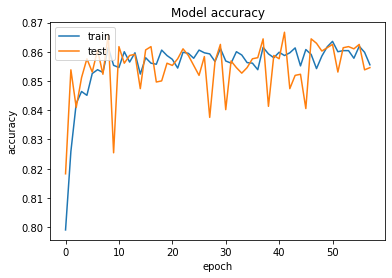

In [303]:
#We will plot the summary history for the accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

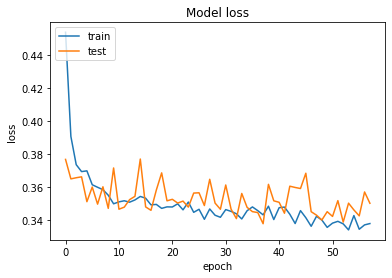

In [304]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

In [307]:
## We now make predictions and evaluate our model

## Using the test set

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [308]:
## Evaluation
## Make confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

In [309]:
cm = confusion_matrix (y_pred, y_test)
cm

array([[1559,  278],
       [  19,  144]], dtype=int64)

In [310]:
##accuracy

score = accuracy_score(y_pred, y_test)

score

0.8515

In [311]:
# If we want to get the weights

#classifier.get_weights()

In [312]:
import pickle
with open("ANN_model.pickle", "wb") as ANN_file:
    
    ANN_file = pickle.dump(model_history, ANN_file)

INFO:tensorflow:Assets written to: ram://ce59d9ea-4a24-42d9-bfe2-644bf9da0e67/assets
